In [0]:
%matplotlib inline

import logging, io,json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

In [3]:
!python -m pip install rasa_nlu[spacy] 

     |████████████████████████████████| 153kB 2.8MB/s 
     |████████████████████████████████| 5.4MB 16.7MB/s 
     |████████████████████████████████| 829kB 35.3MB/s 
     |████████████████████████████████| 665kB 38.4MB/s 
     |████████████████████████████████| 81kB 20.6MB/s 
     |████████████████████████████████| 51kB 12.8MB/s 
     |████████████████████████████████| 12.8MB 30.6MB/s 
     |████████████████████████████████| 25.2MB 41.5MB/s 
     |████████████████████████████████| 81kB 21.4MB/s 
     |████████████████████████████████| 3.1MB 28.6MB/s 
     |████████████████████████████████| 757kB 38.0MB/s 
     |████████████████████████████████| 194kB 42.3MB/s 
     |████████████████████████████████| 153kB 41.3MB/s 
     |████████████████████████████████| 614kB 33.2MB/s 
     |████████████████████████████████| 1.9MB 30.9MB/s 
     |████████████████████████████████| 174kB 39.0MB/s 
     |████████████████████████████████| 61kB 14.2MB/s 
     |████████████████████████████████| 450kB 31.6M

In [4]:
!python -m pip install -U rasa_core==0.9.6



     |████████████████████████████████| 133kB 2.9MB/s 
     |████████████████████████████████| 71kB 20.9MB/s 
     |████████████████████████████████| 133kB 39.5MB/s 
     |████████████████████████████████| 61kB 22.0MB/s 
     |████████████████████████████████| 307kB 41.1MB/s 
     |████████████████████████████████| 4.9MB 59kB/s 
     |████████████████████████████████| 1.0MB 40.5MB/s 
     |████████████████████████████████| 71kB 25.4MB/s 
     |████████████████████████████████| 49.1MB 1.3MB/s 
     |████████████████████████████████| 204kB 39.8MB/s 
     |████████████████████████████████| 3.1MB 29.0MB/s 
     |████████████████████████████████| 890kB 42.5MB/s 
  Created wheel for jsonpickle: filename=jsonpickle-0.9.6-cp36-none-any.whl size=29463 sha256=ad64179bbb477bcb99b237639cf1e7d5ae7fa582e23cd92bf6a202d5db0f0121
  Stored in directory: /root/.cache/pip/wheels/07/8b/41/8ce98f4737a9ff61b1bf2673f2abfe66a6a43ad6e91d2c9736
  Created wheel for slackclient: filename=slackclient-1.3.2-py2.py3-

In [5]:
!pip install -U spacy==2.0.0



     |████████████████████████████████| 13.2MB 2.8MB/s 
     |████████████████████████████████| 81kB 22.9MB/s 
     |████████████████████████████████| 1.2MB 36.8MB/s 
     |████████████████████████████████| 604kB 39.5MB/s 
     |████████████████████████████████| 51kB 17.7MB/s 
     |████████████████████████████████| 143kB 39.4MB/s 
  Created wheel for spacy: filename=spacy-2.0.0-cp36-cp36m-linux_x86_64.whl size=19660070 sha256=e0e87a72123b22f3b6bb09926e4f0bdf405fc998e1e8fb4ab0e2ffacc4ac01e9
  Stored in directory: /root/.cache/pip/wheels/ae/7a/c1/48ed01646ebbacb5cce1cec6cc708708093c37a09ae1d67f77
  Created wheel for thinc: filename=thinc-6.10.3-cp36-cp36m-linux_x86_64.whl size=4120176 sha256=1e46a1c5a9f624ddcd8c7734f9b9a5902105a476e41d00ef7d17f686290eae81
  Stored in directory: /root/.cache/pip/wheels/db/bc/e1/9b321b6b203288cf636a56e668ed5700076af4ed66062278ca
  Created wheel for regex: filename=regex-2017.4.5-cp36-cp36m-linux_x86_64.whl size=533176 sha256=33bb527dc0e4c07adf3ed895c14f06

In [6]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 120.9MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.0.0-cp36-none-any.whl size=122523223 sha256=5dcf97dd9a5536359d8af8c89412e65a29b79498ec906c5dc5bcd063083fd7de
  Stored in directory: /tmp/pip-ephem-wheel-cache-4uy2zkfh/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [7]:
!python -m spacy link en_core_web_md en --force;



    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
import rasa_nlu
import rasa_core
import spacy

In [9]:

nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- Quite bad - can I get a cute picture of a [bird](group:birds), please?
- Really bad and only [doggo](group:shibes) pics and change that.
- Not good. The only thing that could make me fell better is a picture of a cute [kitten](group:cats).
- so sad. Only the picture of a [puppy](group:shibes) could make it better.
- I am very sad. I need a [cat](group:cats) picture.
- Extremely sad. Only the cute [doggo](group:shibes) pics can make me feel better.
- Bad. Please show me a [bird](group:birds) pic!
- Pretty bad to be honest. Can you show me a [puppy](group:shibes) picture to make me fell better?

## intent: inform
- A [dog](group:shibes)
- [dog](group:shibes)
- [bird](group:birds)
- a [cat](group:cats)
- [cat](group:cats)
- a [bird](group:birds)
- of a [dog](group:shibes)
- of a [cat](group:cats)
- a [bird](group:birds), please
- a [dog](group:shibes), please
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


In [10]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


In [11]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'inform', 'mood_affirm', 'mood_unhappy', 'mood_deny', 'greet', 'mood_great', 'goodbye'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_crf
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train 

Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [12]:
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")


INFO:rasa_nlu.model:Successfully saved model into '/content/models/nlu/default/current'


In [16]:
def test(o):   
    print(json.dumps(o, indent=2))
    
test(interpreter.parse("I am very sad. Could you send me a elephant picture? "))

{
  "intent": {
    "name": "mood_unhappy",
    "confidence": 0.6305039564350122
  },
  "entities": [
    {
      "start": 35,
      "end": 43,
      "value": "elephant",
      "entity": "group",
      "confidence": 0.7767780451752395,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "mood_unhappy",
      "confidence": 0.6305039564350122
    },
    {
      "name": "goodbye",
      "confidence": 0.12087842340512966
    },
    {
      "name": "mood_great",
      "confidence": 0.09145947660439577
    },
    {
      "name": "greet",
      "confidence": 0.06454835251608486
    },
    {
      "name": "mood_affirm",
      "confidence": 0.03421906906897747
    },
    {
      "name": "inform",
      "confidence": 0.03182665060045094
    },
    {
      "name": "mood_deny",
      "confidence": 0.026564071369949014
    }
  ],
  "text": "I am very sad. Could you send me a elephant picture? "
}


INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 85 (7 distinct intents)
	- Found intents: 'inform', 'mood_affirm', 'mood_unhappy', 'mood_deny', 'greet', 'mood_great', 'goodbye'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'group'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 85 examples that have a defined intent out of 85 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9881730469965763
INFO:rasa_nlu.evaluate:Precision: 0.9890756302521008
INFO:rasa_nlu.evaluate:Accuracy:  0.9882352941176471
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

     goodbye       1.00      0.91      0.95        11
       greet       0.93      1.00      0.96        13
      inform    

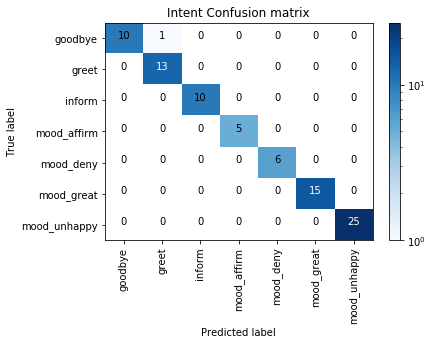

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9775529042760154
INFO:rasa_nlu.evaluate:Precision: 0.9780517143345049
INFO:rasa_nlu.evaluate:Accuracy:  0.9787985865724381
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

      group       0.93      0.72      0.81        18
  no_entity       0.98      1.00      0.99       265

avg / total       0.98      0.98      0.98       283



In [17]:
from rasa_nlu.evaluate import run_evaluation
run_evaluation("nlu.md", model_directory)

In [18]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_ask_picture
* inform{"animal":"dog"}  
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_picture
* inform{"group":"cat"}
  - action_retrieve_image
  - utter_did_that_help
* mood_deny
  - utter_goodbye
  
## sad path 3
* greet
  - utter_greet
* mood_unhappy{"group":"puppy"}
  - action_retrieve_image
  - utter_did_that_help
* mood_affirm
  - utter_happy
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


In [19]:
domain_yml = """
intents:
- greet
- goodbye
- mood_affirm
- mood_deny
- mood_great
- mood_unhappy
- inform

slots:
  group:
    type: text
    
entities:
- group

actions:
- utter_greet
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_picture
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
  
  utter_ask_picture:
  - text: "To cheer you up, I can show you a cute picture of a dog, cat or a bird. Which one do you choose?"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


In [20]:
!pip install requests

In [22]:
!pip install ipython

In [0]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display

import requests

class ApiAction(Action):
    def name(self):
        return "action_retrieve_image"

    def run(self, dispatcher, tracker, domain):
        
        group = tracker.get_slot('group')
        
        r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsUrls=true'.format(group))
        response = r.content.decode()
        response = response.replace('["',"")
        response = response.replace('"]',"")
   
        
        #display(Image(response[0], height=550, width=520))
        dispatcher.utter_message("Here is something to cheer you up: {}".format(response))

In [25]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# this will catch predictions the model isn't very certain about
# there is a threshold for the NLU predictions as well as the action predictions
fallback = FallbackPolicy(fallback_action_name="utter_unclear",
                          core_threshold=0.2,
                          nlu_threshold=0.1)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=100
)

agent.persist('models/dialogue')

Processed Story Blocks: 100%|██████████| 7/7 [00:00<00:00, 130.99it/s, # trackers=13]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 256/256 [00:10<00:00, 23.44it/s, # actions=281]
INFO:rasa_core.featurizers:Created 281 action examples.
Processed actions: 281it [00:00, 423.31it/s, # examples=281]
INFO:rasa_core.policies.memoization:Memorized 281 unique action examples.
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 256/256 [00:10<00:00, 24.42it/s, # actions=281]
INFO:rasa_core.featurizers:Created 281 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 281 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 5, 18)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                6528      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 297       
_________________________________________________________________
activation_2 (Activation)    (None, 9)                 0         
Total params: 6,825
Trainable params: 6,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
281/281 [==============================] - 2s 9ms/step - loss: 2.1141 - acc: 0.2989
Epoch 2/100
281/281 [==============================] - 0s 480us/step - loss: 1.9964 - acc: 0.4626
Epoch 3/100
281/281 [==============================] - 0s 493us/step - loss: 1

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


In [26]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


In [0]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
hey
Hey! How are you?
iam going to save the world
Great carry on!
my day was horrible
Great carry on!
i don't feel very well
Hey! How are you?
not good
Here is something to cheer you up: https://cdn.shibe.online/birds/0e75ba7b9ced9561c1a18b6f6332764347760153.jpg
Did that help you?
no
Great carry on!
yes
Great carry on!
please show me a picture
I am not sure what you are aiming for.
dog
Bye
you idit
Bye
you idiot
Great carry on!
